This notebook tests the MH algorithm used to update the concentration parameter $\alpha$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from scipy.special import gammaln

rcParams["text.usetex"] = True
rcParams["xtick.labelsize"]=14
rcParams["ytick.labelsize"]=14
rcParams["xtick.direction"]="in"
rcParams["ytick.direction"]="in"
rcParams["legend.fontsize"]=15
rcParams["legend.frameon"]=False
rcParams["axes.labelsize"]=16
rcParams["axes.grid"] = True
rcParams["grid.alpha"] = 0.6

In [5]:
def MH_alpha(N_draws, n_samples, n_clusters, a0 = 1):
    alpha = []
    a_old = a0
    for _ in range(N_draws):
        a_new = a_old + np.random.uniform(-1,1)*0.5
        if a_new > 0:
            logP_old = gammaln(a_old) - gammaln(a_old + n_samples) + n_clusters * np.log(a_old) - 1./a_old
            logP_new = gammaln(a_new) - gammaln(a_new + n_samples) + n_clusters * np.log(a_new) - 1./a_new
            if logP_new - logP_old > np.log(np.random.uniform()):
                a_old = a_new
        alpha.append(a_old)
    return np.array(alpha)

def autocorrelation(x):
    taumax = len(x)//2
    ac = np.zeros(taumax)
    mean = np.mean(x)
    s2   = np.mean((x-mean)**2)
    
    for tau in range(taumax):
        ac[tau] = np.mean([(x[i]-mean)*(x[(tau+i)%len(x)]-mean) for i in range(len(x))])/s2
    return ac

In this example we will assume to have $n=1000$ samples in $K=8$ different clusters, drawing $N=1000$ values for $\alpha$.

In [11]:
n = 1000
K = 8
N = 1000

Text(0.5, 0, '$\\alpha$')

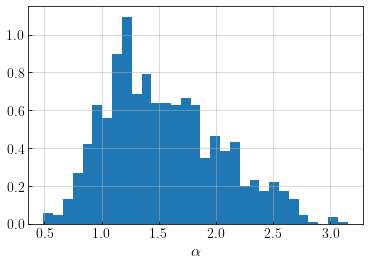

In [31]:
alpha = MH_alpha(N, n, 8)
fig_alpha, ax_alpha = plt.subplots()
ax_alpha.hist(alpha, bins = int(np.sqrt(len(alpha))), density = True)
ax_alpha.set_xlabel('$\\alpha$')

Text(0, 0.5, '$C(\\tau)$')

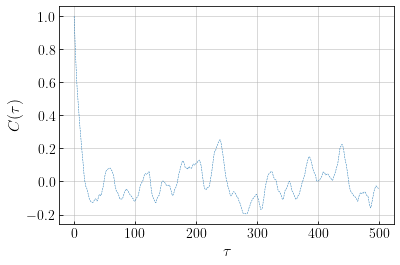

In [32]:
ac = autocorrelation(alpha)
fig_ac, ax_ac = plt.subplots()
ax_ac.plot(ac, ls = '--', marker = '', lw = 0.5)
ax_ac.set_xlabel('$\\tau$')
ax_ac.set_ylabel('$C(\\tau)$')